In [1]:
import numpy as np
from numpy import exp, sqrt, pi

import matplotlib.pyplot as plt
from scipy.integrate import fixed_quad, quadrature, quad, nquad
import sys

sys.path.append("../Codes/")
from Hall1997 import *
from quad_utils import *
from angle_Hall1997 import *

In [2]:
mu = 1
sigma = 1
a = 1.5
theta = 0.3

upper_bdy = lambda t: a - theta * t
lower_bdy = lambda t: -a + theta * t

# collapse at a / theta
T1, T2, T3, T4 = 0.8, 1, 0.5, 0.4 
t1, t2, t3, t4 = np.cumsum([T1, T2, T3, T4])
x0 = -0.7

In [3]:
p = lambda x, t, y, s, mu: density_vertical(x, mu=mu, a=a - theta * s, b=theta, x0=y, T=t - s, trunc_num=100)
fu = lambda t, y, s, mu: density_upper(t-s, mu=mu, a=a - theta * s, b=theta, x0=y, trunc_num=100)
fl = lambda t, y, s, mu: density_lower(t-s, mu=mu, a=a - theta * s, b=theta, x0=y, trunc_num=100)

In [4]:
# reference
eps = 1e-2
ts = np.linspace(eps, t4 - eps, 1000)

probu_list = []
probl_list = []
for t in ts:
    probu_list.append(fu(t, x0, 0, mu))
    probl_list.append(fl(t, x0, 0, mu))

In [5]:
t1s = np.linspace(eps, t1 - eps, 200)
t2s = np.linspace(t1 + eps, t2 - eps, 100)
t3s = np.linspace(t2 + eps, t3 - eps, 100)
t4s = np.linspace(t3 + eps, t4 - eps, 100)

In [6]:
# multi-dimensional Gauss-Legendre quadrature
# first stage, analytical
p1u_gaussfun_list, p1l_gaussfun_list = [], []
for t in t1s:
    p1u_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu], t_list=[], a=a, theta=theta, x0=x0, bdy=1))
    p1l_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu], t_list=[], a=a, theta=theta, x0=x0, bdy=-1))

# second stage, 1D integral
p2u_gaussfun_list, p2l_gaussfun_list = [], []
for t in t2s:
    p2u_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu, mu], t_list=[t1], a=a, theta=theta, x0=x0, bdy=1))
    p2l_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu, mu], t_list=[t1], a=a, theta=theta, x0=x0, bdy=-1))
    
# third stage, 2D integral
p3u_gaussfun_list, p3l_gaussfun_list = [], []
for t in t3s:
    p3u_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu, mu, mu], t_list=[t1, t2], a=a, theta=theta, x0=x0, bdy=1))
    p3l_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu, mu, mu], t_list=[t1, t2], a=a, theta=theta, x0=x0, bdy=-1))
    
# fourth stage, 3D integral
p4u_gaussfun_list, p4l_gaussfun_list = [], []
for t in t4s:
    p4u_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu, mu, mu, mu], t_list=[t1, t2, t3], a=a, theta=theta, x0=x0, bdy=1))
    p4l_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu, mu, mu, mu], t_list=[t1, t2, t3], a=a, theta=theta, x0=x0, bdy=-1))

In [7]:
# sequential trapezoidal rule
# first stage, analytical
p1u_seqfun_list, p1l_seqfun_list = [], []
for t in t1s:
    p1u_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu], t_list=[], a=a, theta=theta, x0=x0, bdy=1))
    p1l_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu], t_list=[], a=a, theta=theta, x0=x0, bdy=-1))

# second stage, 1D integral
p2u_seqfun_list, p2l_seqfun_list = [], []
for t in t2s:
    p2u_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu, mu], t_list=[t1], a=a, theta=theta, x0=x0, bdy=1))
    p2l_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu, mu], t_list=[t1], a=a, theta=theta, x0=x0, bdy=-1))
    
# third stage, 2D integral
p3u_seqfun_list, p3l_seqfun_list = [], []
for t in t3s:
    p3u_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu, mu, mu], t_list=[t1, t2], a=a, theta=theta, x0=x0, bdy=1))
    p3l_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu, mu, mu], t_list=[t1, t2], a=a, theta=theta, x0=x0, bdy=-1))
    
# fourth stage, 3D integral
p4u_seqfun_list, p4l_seqfun_list = [], []
for t in t4s:
    p4u_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu, mu, mu, mu], t_list=[t1, t2, t3], a=a, theta=theta, x0=x0, bdy=1))
    p4l_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu, mu, mu, mu], t_list=[t1, t2, t3], a=a, theta=theta, x0=x0, bdy=-1))  

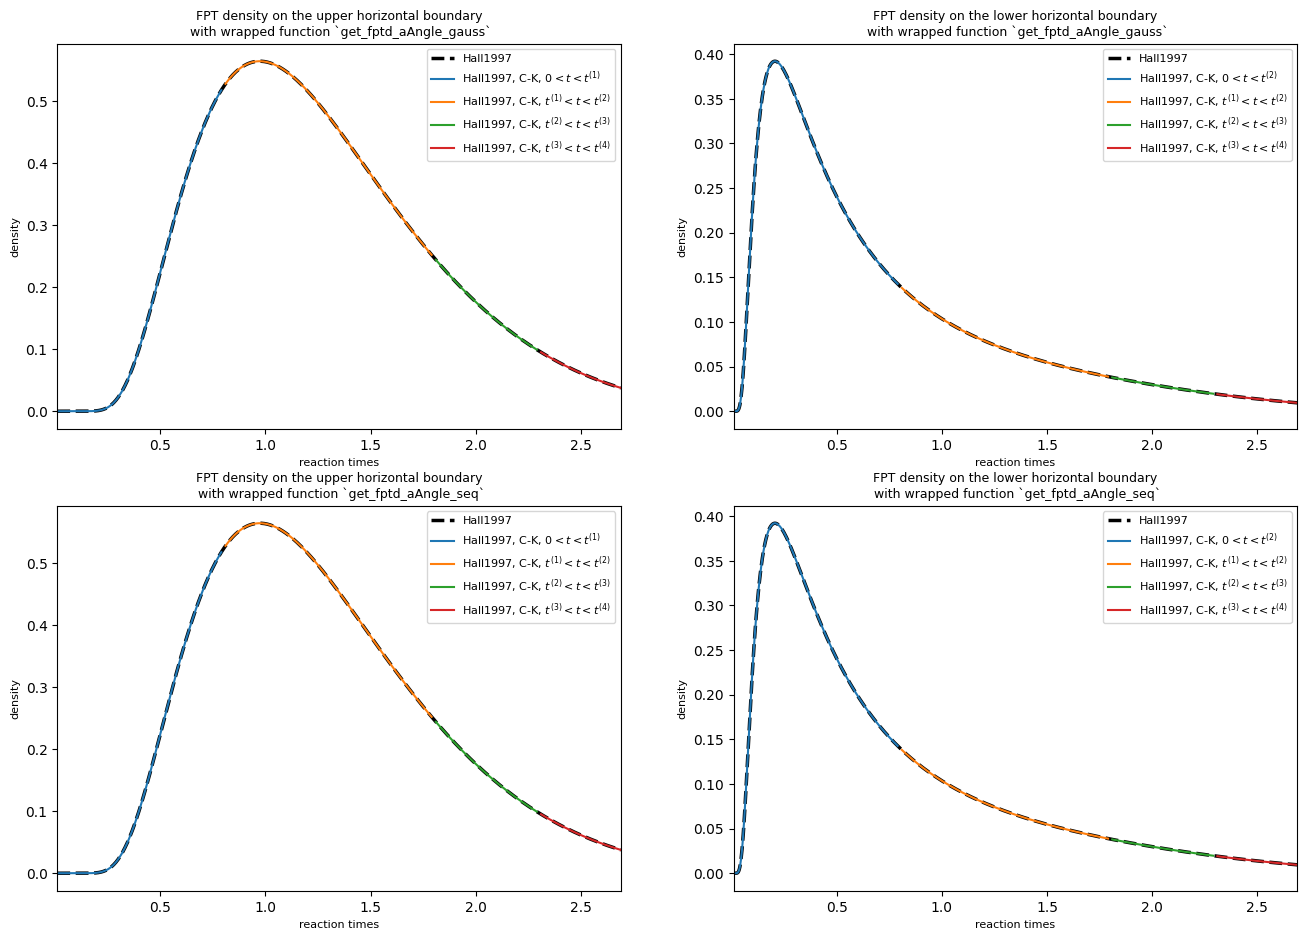

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(16, 11), dpi=100)
ax[0, 0].plot(ts, probu_list, color="k", linestyle="--", linewidth=2.5, label="Hall1997")
ax[0, 0].plot(t1s, p1u_gaussfun_list, label="Hall1997, C-K, " + "$0 <t<t^{(1)}$")
ax[0, 0].plot(t2s, p2u_gaussfun_list, label="Hall1997, C-K, " + "$t^{(1)}<t<t^{(2)}$")
ax[0, 0].plot(t3s, p3u_gaussfun_list, label="Hall1997, C-K, " + "$t^{(2)}<t<t^{(3)}$")
ax[0, 0].plot(t4s, p4u_gaussfun_list, label="Hall1997, C-K, " + "$t^{(3)}<t<t^{(4)}$")
ax[0, 0].legend(fontsize=8)
ax[0, 0].set_title("FPT density on the upper horizontal boundary\n with wrapped function `get_fptd_aAngle_gauss`", fontsize=9)
ax[0, 0].set_xlabel("reaction times", fontsize=8)
ax[0, 0].set_ylabel("density", fontsize=8)
ax[0, 0].autoscale(tight=True, axis="x")

ax[0, 1].plot(ts, probl_list, color="k", linestyle="--", linewidth=2.5, label="Hall1997")
ax[0, 1].plot(t1s, p1l_gaussfun_list, label="Hall1997, C-K, " + "$0<t<t^{(2)}$")
ax[0, 1].plot(t2s, p2l_gaussfun_list, label="Hall1997, C-K, " + "$t^{(1)}<t<t^{(2)}$")
ax[0, 1].plot(t3s, p3l_gaussfun_list, label="Hall1997, C-K, " + "$t^{(2)}<t<t^{(3)}$")
ax[0, 1].plot(t4s, p4l_gaussfun_list, label="Hall1997, C-K, " + "$t^{(3)}<t<t^{(4)}$")
ax[0, 1].legend(fontsize=8)
ax[0, 1].set_title("FPT density on the lower horizontal boundary\n with wrapped function `get_fptd_aAngle_gauss`", fontsize=9)
ax[0, 1].set_xlabel("reaction times", fontsize=8)
ax[0, 1].set_ylabel("density", fontsize=8)
ax[0, 1].autoscale(tight=True, axis="x")

ax[1, 0].plot(ts, probu_list, color="k", linestyle="--", linewidth=2.5, label="Hall1997")
ax[1, 0].plot(t1s, p1u_seqfun_list, label="Hall1997, C-K, " + "$0 <t<t^{(1)}$")
ax[1, 0].plot(t2s, p2u_seqfun_list, label="Hall1997, C-K, " + "$t^{(1)}<t<t^{(2)}$")
ax[1, 0].plot(t3s, p3u_seqfun_list, label="Hall1997, C-K, " + "$t^{(2)}<t<t^{(3)}$")
ax[1, 0].plot(t4s, p4u_seqfun_list, label="Hall1997, C-K, " + "$t^{(3)}<t<t^{(4)}$")
ax[1, 0].legend(fontsize=8)
ax[1, 0].set_title("FPT density on the upper horizontal boundary\n with wrapped function `get_fptd_aAngle_seq`", fontsize=9)
ax[1, 0].set_xlabel("reaction times", fontsize=8)
ax[1, 0].set_ylabel("density", fontsize=8)
ax[1, 0].autoscale(tight=True, axis="x")

ax[1, 1].plot(ts, probl_list, color="k", linestyle="--", linewidth=2.5, label="Hall1997")
ax[1, 1].plot(t1s, p1l_seqfun_list, label="Hall1997, C-K, " + "$0<t<t^{(2)}$")
ax[1, 1].plot(t2s, p2l_seqfun_list, label="Hall1997, C-K, " + "$t^{(1)}<t<t^{(2)}$")
ax[1, 1].plot(t3s, p3l_seqfun_list, label="Hall1997, C-K, " + "$t^{(2)}<t<t^{(3)}$")
ax[1, 1].plot(t4s, p4l_seqfun_list, label="Hall1997, C-K, " + "$t^{(3)}<t<t^{(4)}$")
ax[1, 1].legend(fontsize=8)
ax[1, 1].set_title("FPT density on the lower horizontal boundary\n with wrapped function `get_fptd_aAngle_seq`", fontsize=9)
ax[1, 1].set_xlabel("reaction times", fontsize=8)
ax[1, 1].set_ylabel("density", fontsize=8)
ax[1, 1].autoscale(tight=True, axis="x")

plt.show()

In [9]:
%timeit get_fptd_aAngle_gauss(t=0+T1/2, mu_list=[mu], t_list=[], a=a, theta=theta, x0=x0, bdy=1)
%timeit get_fptd_aAngle_gauss(t=t1+T2/2, mu_list=[mu, mu], t_list=[t1], a=a, theta=theta, x0=x0, bdy=1)
%timeit get_fptd_aAngle_gauss(t=t2+T3/2, mu_list=[mu, mu, mu], t_list=[t1, t2], a=a, theta=theta, x0=x0, bdy=1)
%timeit get_fptd_aAngle_gauss(t=t3+T4/2, mu_list=[mu, mu, mu, mu], t_list=[t1, t2, t3], a=a, theta=theta, x0=x0, bdy=1)

24.1 µs ± 152 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
710 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.2 ms ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.65 ms ± 45.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%timeit get_fptd_aAngle_seq(t=0+T1/2, mu_list=[mu], t_list=[], a=a, theta=theta, x0=x0, bdy=1)
%timeit get_fptd_aAngle_seq(t=t1+T2/2, mu_list=[mu, mu], t_list=[t1], a=a, theta=theta, x0=x0, bdy=1)
%timeit get_fptd_aAngle_seq(t=t2+T3/2, mu_list=[mu, mu, mu], t_list=[t1, t2], a=a, theta=theta, x0=x0, bdy=1)
%timeit get_fptd_aAngle_seq(t=t3+T4/2, mu_list=[mu, mu, mu, mu], t_list=[t1, t2, t3], a=a, theta=theta, x0=x0, bdy=1)

23.7 µs ± 113 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
8.22 ms ± 88.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
534 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.04 s ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### piecewise constant drift rate

In [11]:
mu1, mu2, mu3, mu4 = 1, -0.5, 1.5, -1

eps = 1e-3
t1s = np.linspace(eps, t1 - eps, 200)
t2s = np.linspace(t1 + eps, t2 - eps, 100)
t3s = np.linspace(t2 + eps, t3 - eps, 100)
t4s = np.linspace(t3 + eps, t4 - eps, 100)

#### check the 'flattened' version first

In [12]:
# flattened, Gauss-Legendre quadrature
# first stage, analytical
p1u_gauss_list, p1l_gauss_list = [], []
for t in t1s:
    p1u_gauss_list.append(fu(t, x0, 0, mu1))
    p1l_gauss_list.append(fl(t, x0, 0, mu1))

# second stage, 1D integral
int_range = [[lower_bdy(t1), upper_bdy(t1)]]
int_orders = [20]
p2u_gauss_list, p2l_gauss_list = [], []
for t in t2s:
    integrand = lambda x1: p(x1, t1, x0, 0, mu1) * fu(t, x1, t1, mu2)
    p2u_gauss_list.append(Gauss_quad_nD(integrand, int_range, int_orders))
    integrand = lambda x1: p(x1, t1, x0, 0, mu1) * fl(t, x1, t1, mu2)
    p2l_gauss_list.append(Gauss_quad_nD(integrand, int_range, int_orders))
    
# third stage, 2D integral
int_range = [[lower_bdy(t1), upper_bdy(t1)], [lower_bdy(t2), upper_bdy(t2)]]
int_orders = [5, 20]
p3u_gauss_list, p3l_gauss_list = [], []
for t in t3s:
    integrand = lambda x1, x2: p(x2, t2, x1, t1, mu2) * p(x1, t1, x0, 0, mu1) * fu(t, x2, t2, mu3)
    p3u_gauss_list.append(Gauss_quad_nD(integrand, int_range, int_orders))
    integrand = lambda x1, x2: p(x2, t2, x1, t1, mu2) * p(x1, t1, x0, 0, mu1) * fl(t, x2, t2, mu3)
    p3l_gauss_list.append(Gauss_quad_nD(integrand, int_range, int_orders))

# fourth stage, 3D integral
int_range = [[lower_bdy(t1), upper_bdy(t1)], [lower_bdy(t2), upper_bdy(t2)], [lower_bdy(t3), upper_bdy(t3)]]
int_orders = [5, 5, 20]
p4u_gauss_list, p4l_gauss_list = [], []
for t in t4s:
    integrand = lambda x1, x2, x3: p(x3, t3, x2, t2, mu3) * p(x2, t2, x1, t1, mu2) * p(x1, t1, x0, 0, mu1) * fu(t, x3, t3, mu4)
    p4u_gauss_list.append(Gauss_quad_nD(integrand, int_range, int_orders))
    integrand = lambda x1, x2, x3: p(x3, t3, x2, t2, mu3) * p(x2, t2, x1, t1, mu2) * p(x1, t1, x0, 0, mu1) * fl(t, x3, t3, mu4)
    p4l_gauss_list.append(Gauss_quad_nD(integrand, int_range, int_orders))

In [13]:
# flattened, sequential trapezoidal rule
# first stage, analytical
x1s = np.linspace(lower_bdy(t1), upper_bdy(t1), 100)
p1u_seq_list = []
p1l_seq_list = []
p1v_seq_list = []
for t in t1s:
    p1u_seq_list.append(fu(t, x0, 0, mu1))
    p1l_seq_list.append(fl(t, x0, 0, mu1))
for x1 in x1s:
    p1v_seq_list.append(p(x1, t1, x0, 0, mu1))
    
# second stage, 1D integral
t2s = np.linspace(t1 + eps, t2 - eps, 100)
x2s = np.linspace(lower_bdy(t2), upper_bdy(t2), 100)
p2u_seq_list = []
p2l_seq_list = []
p2v_seq_list = []
for t in t2s:
    # int p(x1, t1, x0, 0) * f(t, x1, t1) dx1
    result_u, result_l = 0, 0
    for i in range(1, len(x1s) - 1):
        result_u += p1v_seq_list[i] * fu(t, x1s[i], t1, mu2)
        result_l += p1v_seq_list[i] * fl(t, x1s[i], t1, mu2)
    result_u *= (x1s[1] - x1s[0])
    result_l *= (x1s[1] - x1s[0])
    p2u_seq_list.append(result_u)
    p2l_seq_list.append(result_l)
for x2 in x2s:
    # int p(x1, t1, x0, 0) * p(x2, t2, x1, t1) dx1
    result_v = 0
    for i in range(1, len(x1s) - 1):
        result_v += p1v_seq_list[i] * p(x2, t2, x1s[i], t1, mu2)
    result_v *= (x1s[1] - x1s[0])
    p2v_seq_list.append(result_v)

# third stage, 2D integral
t3s = np.linspace(t2 + eps, t3 - eps, 100)
x3s = np.linspace(lower_bdy(t3), upper_bdy(t3), 100)
p3u_seq_list = []
p3l_seq_list = []
p3v_seq_list = []
for t in t3s:
    result_u, result_l = 0, 0
    for i in range(1, len(x2s) - 1):
        result_u += p2v_seq_list[i] * fu(t, x2s[i], t2, mu3)
        result_l += p2v_seq_list[i] * fl(t, x2s[i], t2, mu3)
    result_u *= (x2s[1] - x2s[0])
    result_l *= (x2s[1] - x2s[0])
    p3u_seq_list.append(result_u)
    p3l_seq_list.append(result_l)
for x3 in x3s:
    result_v = 0
    for i in range(1, len(x2s) - 1):
        result_v += p2v_seq_list[i] * p(x3, t3, x2s[i], t2, mu3)
    result_v *= (x2s[1] - x2s[0])
    p3v_seq_list.append(result_v)
    
# fourth stage, 3D integral
t4s = np.linspace(t3 + eps, t4 - eps, 100)
x4s = np.linspace(lower_bdy(t4), upper_bdy(t4), 100)
p4u_seq_list = []
p4l_seq_list = []
p4v_seq_list = []
for t in t4s:
    result_u, result_l = 0, 0
    for i in range(1, len(x3s) - 1):
        result_u += p3v_seq_list[i] * fu(t, x3s[i], t3, mu4)
        result_l += p3v_seq_list[i] * fl(t, x3s[i], t3, mu4)
    result_u *= (x3s[1] - x3s[0])
    result_l *= (x3s[1] - x3s[0])
    p4u_seq_list.append(result_u)
    p4l_seq_list.append(result_l)
for x4 in x4s:
    result_v = 0
    for i in range(1, len(x3s) - 1):
        result_v += p3v_seq_list[i] * p(x4, t4, x3s[i], t3, mu4)
    result_v *= (x3s[1] - x3s[0])
    p4v_seq_list.append(result_v)

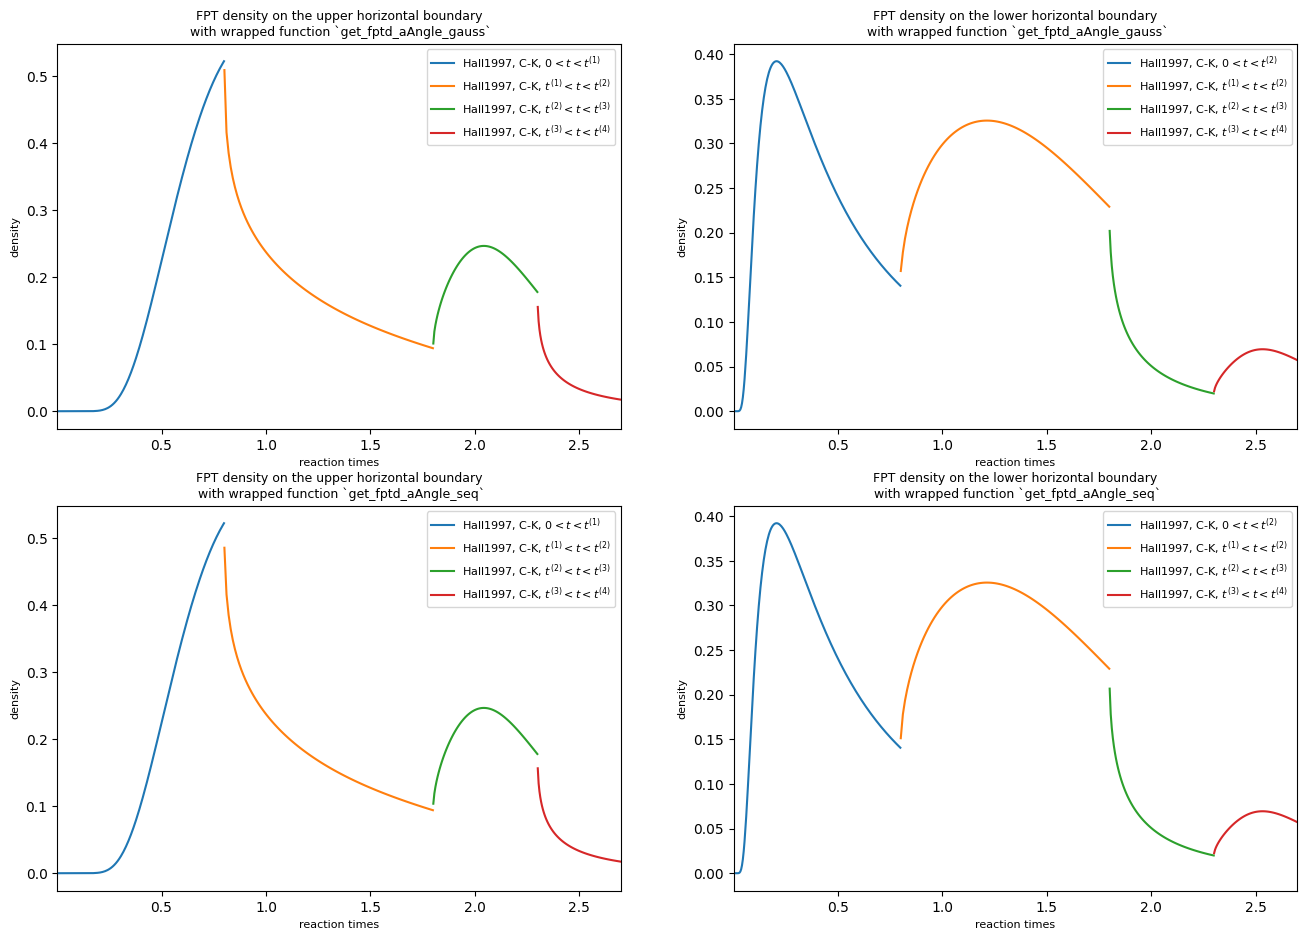

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(16, 11), dpi=100)
ax[0, 0].plot(t1s, p1u_gauss_list, label="Hall1997, C-K, " + "$0 <t<t^{(1)}$")
ax[0, 0].plot(t2s, p2u_gauss_list, label="Hall1997, C-K, " + "$t^{(1)}<t<t^{(2)}$")
ax[0, 0].plot(t3s, p3u_gauss_list, label="Hall1997, C-K, " + "$t^{(2)}<t<t^{(3)}$")
ax[0, 0].plot(t4s, p4u_gauss_list, label="Hall1997, C-K, " + "$t^{(3)}<t<t^{(4)}$")
ax[0, 0].legend(fontsize=8)
ax[0, 0].set_title("FPT density on the upper horizontal boundary\n with wrapped function `get_fptd_aAngle_gauss`", fontsize=9)
ax[0, 0].set_xlabel("reaction times", fontsize=8)
ax[0, 0].set_ylabel("density", fontsize=8)
ax[0, 0].autoscale(tight=True, axis="x")

ax[0, 1].plot(t1s, p1l_gauss_list, label="Hall1997, C-K, " + "$0<t<t^{(2)}$")
ax[0, 1].plot(t2s, p2l_gauss_list, label="Hall1997, C-K, " + "$t^{(1)}<t<t^{(2)}$")
ax[0, 1].plot(t3s, p3l_gauss_list, label="Hall1997, C-K, " + "$t^{(2)}<t<t^{(3)}$")
ax[0, 1].plot(t4s, p4l_gauss_list, label="Hall1997, C-K, " + "$t^{(3)}<t<t^{(4)}$")
ax[0, 1].legend(fontsize=8)
ax[0, 1].set_title("FPT density on the lower horizontal boundary\n with wrapped function `get_fptd_aAngle_gauss`", fontsize=9)
ax[0, 1].set_xlabel("reaction times", fontsize=8)
ax[0, 1].set_ylabel("density", fontsize=8)
ax[0, 1].autoscale(tight=True, axis="x")

ax[1, 0].plot(t1s, p1u_seq_list, label="Hall1997, C-K, " + "$0 <t<t^{(1)}$")
ax[1, 0].plot(t2s, p2u_seq_list, label="Hall1997, C-K, " + "$t^{(1)}<t<t^{(2)}$")
ax[1, 0].plot(t3s, p3u_seq_list, label="Hall1997, C-K, " + "$t^{(2)}<t<t^{(3)}$")
ax[1, 0].plot(t4s, p4u_seq_list, label="Hall1997, C-K, " + "$t^{(3)}<t<t^{(4)}$")
ax[1, 0].legend(fontsize=8)
ax[1, 0].set_title("FPT density on the upper horizontal boundary\n with wrapped function `get_fptd_aAngle_seq`", fontsize=9)
ax[1, 0].set_xlabel("reaction times", fontsize=8)
ax[1, 0].set_ylabel("density", fontsize=8)
ax[1, 0].autoscale(tight=True, axis="x")

ax[1, 1].plot(t1s, p1l_seq_list, label="Hall1997, C-K, " + "$0<t<t^{(2)}$")
ax[1, 1].plot(t2s, p2l_seq_list, label="Hall1997, C-K, " + "$t^{(1)}<t<t^{(2)}$")
ax[1, 1].plot(t3s, p3l_seq_list, label="Hall1997, C-K, " + "$t^{(2)}<t<t^{(3)}$")
ax[1, 1].plot(t4s, p4l_seq_list, label="Hall1997, C-K, " + "$t^{(3)}<t<t^{(4)}$")
ax[1, 1].legend(fontsize=8)
ax[1, 1].set_title("FPT density on the lower horizontal boundary\n with wrapped function `get_fptd_aAngle_seq`", fontsize=9)
ax[1, 1].set_xlabel("reaction times", fontsize=8)
ax[1, 1].set_ylabel("density", fontsize=8)
ax[1, 1].autoscale(tight=True, axis="x")

plt.show()

In [15]:
# multi-dimensional Gauss-Legendre quadrature
# first stage, analytical
p1u_gaussfun_list, p1l_gaussfun_list = [], []
for t in t1s:
    p1u_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu1], t_list=[], a=a, theta=theta, x0=x0, bdy=1))
    p1l_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu1], t_list=[], a=a, theta=theta, x0=x0, bdy=-1))

# second stage, 1D integral
p2u_gaussfun_list, p2l_gaussfun_list = [], []
for t in t2s:
    p2u_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu1, mu2], t_list=[t1], a=a, theta=theta, x0=x0, bdy=1))
    p2l_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu1, mu2], t_list=[t1], a=a, theta=theta, x0=x0, bdy=-1))
    
# third stage, 2D integral
p3u_gaussfun_list, p3l_gaussfun_list = [], []
for t in t3s:
    p3u_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu1, mu2, mu3], t_list=[t1, t2], a=a, theta=theta, x0=x0, bdy=1))
    p3l_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu1, mu2, mu3], t_list=[t1, t2], a=a, theta=theta, x0=x0, bdy=-1))
    
# fourth stage, 3D integral
p4u_gaussfun_list, p4l_gaussfun_list = [], []
for t in t4s:
    p4u_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu1, mu2, mu3, mu4], t_list=[t1, t2, t3], a=a, theta=theta, x0=x0, bdy=1))
    p4l_gaussfun_list.append(get_fptd_aAngle_gauss(t, mu_list=[mu1, mu2, mu3, mu4], t_list=[t1, t2, t3], a=a, theta=theta, x0=x0, bdy=-1))

In [16]:
# sequential trapezoidal rule
# first stage, analytical
p1u_seqfun_list, p1l_seqfun_list = [], []
for t in t1s:
    p1u_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu1], t_list=[], a=a, theta=theta, x0=x0, bdy=1))
    p1l_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu1], t_list=[], a=a, theta=theta, x0=x0, bdy=-1))

# second stage, 1D integral
p2u_seqfun_list, p2l_seqfun_list = [], []
for t in t2s:
    p2u_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu1, mu2], t_list=[t1], a=a, theta=theta, x0=x0, bdy=1))
    p2l_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu1, mu2], t_list=[t1], a=a, theta=theta, x0=x0, bdy=-1))
    
# third stage, 2D integral
p3u_seqfun_list, p3l_seqfun_list = [], []
for t in t3s:
    p3u_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu1, mu2, mu3], t_list=[t1, t2], a=a, theta=theta, x0=x0, bdy=1))
    p3l_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu1, mu2, mu3], t_list=[t1, t2], a=a, theta=theta, x0=x0, bdy=-1))
    
# fourth stage, 3D integral
p4u_seqfun_list, p4l_seqfun_list = [], []
for t in t4s:
    p4u_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu1, mu2, mu3, mu4], t_list=[t1, t2, t3], a=a, theta=theta, x0=x0, bdy=1))
    p4l_seqfun_list.append(get_fptd_aAngle_seq(t, mu_list=[mu1, mu2, mu3, mu4], t_list=[t1, t2, t3], a=a, theta=theta, x0=x0, bdy=-1))  

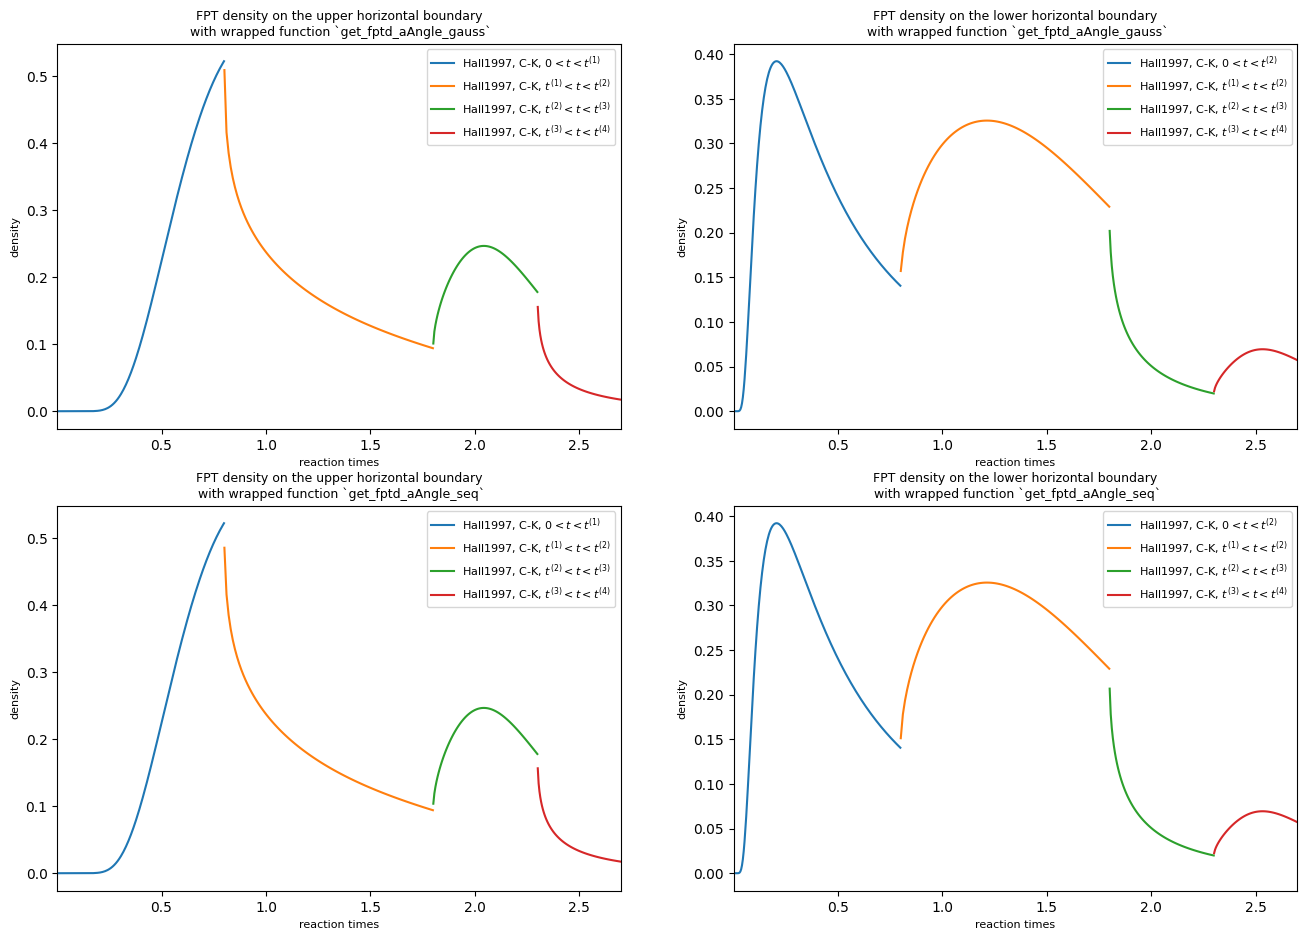

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(16, 11), dpi=100)
ax[0, 0].plot(t1s, p1u_gaussfun_list, label="Hall1997, C-K, " + "$0 <t<t^{(1)}$")
ax[0, 0].plot(t2s, p2u_gaussfun_list, label="Hall1997, C-K, " + "$t^{(1)}<t<t^{(2)}$")
ax[0, 0].plot(t3s, p3u_gaussfun_list, label="Hall1997, C-K, " + "$t^{(2)}<t<t^{(3)}$")
ax[0, 0].plot(t4s, p4u_gaussfun_list, label="Hall1997, C-K, " + "$t^{(3)}<t<t^{(4)}$")
ax[0, 0].legend(fontsize=8)
ax[0, 0].set_title("FPT density on the upper horizontal boundary\n with wrapped function `get_fptd_aAngle_gauss`", fontsize=9)
ax[0, 0].set_xlabel("reaction times", fontsize=8)
ax[0, 0].set_ylabel("density", fontsize=8)
ax[0, 0].autoscale(tight=True, axis="x")

ax[0, 1].plot(t1s, p1l_gaussfun_list, label="Hall1997, C-K, " + "$0<t<t^{(2)}$")
ax[0, 1].plot(t2s, p2l_gaussfun_list, label="Hall1997, C-K, " + "$t^{(1)}<t<t^{(2)}$")
ax[0, 1].plot(t3s, p3l_gaussfun_list, label="Hall1997, C-K, " + "$t^{(2)}<t<t^{(3)}$")
ax[0, 1].plot(t4s, p4l_gaussfun_list, label="Hall1997, C-K, " + "$t^{(3)}<t<t^{(4)}$")
ax[0, 1].legend(fontsize=8)
ax[0, 1].set_title("FPT density on the lower horizontal boundary\n with wrapped function `get_fptd_aAngle_gauss`", fontsize=9)
ax[0, 1].set_xlabel("reaction times", fontsize=8)
ax[0, 1].set_ylabel("density", fontsize=8)
ax[0, 1].autoscale(tight=True, axis="x")

ax[1, 0].plot(t1s, p1u_seqfun_list, label="Hall1997, C-K, " + "$0 <t<t^{(1)}$")
ax[1, 0].plot(t2s, p2u_seqfun_list, label="Hall1997, C-K, " + "$t^{(1)}<t<t^{(2)}$")
ax[1, 0].plot(t3s, p3u_seqfun_list, label="Hall1997, C-K, " + "$t^{(2)}<t<t^{(3)}$")
ax[1, 0].plot(t4s, p4u_seqfun_list, label="Hall1997, C-K, " + "$t^{(3)}<t<t^{(4)}$")
ax[1, 0].legend(fontsize=8)
ax[1, 0].set_title("FPT density on the upper horizontal boundary\n with wrapped function `get_fptd_aAngle_seq`", fontsize=9)
ax[1, 0].set_xlabel("reaction times", fontsize=8)
ax[1, 0].set_ylabel("density", fontsize=8)
ax[1, 0].autoscale(tight=True, axis="x")

ax[1, 1].plot(t1s, p1l_seqfun_list, label="Hall1997, C-K, " + "$0<t<t^{(2)}$")
ax[1, 1].plot(t2s, p2l_seqfun_list, label="Hall1997, C-K, " + "$t^{(1)}<t<t^{(2)}$")
ax[1, 1].plot(t3s, p3l_seqfun_list, label="Hall1997, C-K, " + "$t^{(2)}<t<t^{(3)}$")
ax[1, 1].plot(t4s, p4l_seqfun_list, label="Hall1997, C-K, " + "$t^{(3)}<t<t^{(4)}$")
ax[1, 1].legend(fontsize=8)
ax[1, 1].set_title("FPT density on the lower horizontal boundary\n with wrapped function `get_fptd_aAngle_seq`", fontsize=9)
ax[1, 1].set_xlabel("reaction times", fontsize=8)
ax[1, 1].set_ylabel("density", fontsize=8)
ax[1, 1].autoscale(tight=True, axis="x")

plt.show()